# 108.将有序数组转换为二叉搜索树
输入：一个按照升序排列的数组   
输出：一个高度平衡的二叉搜索树  

平衡的二叉搜索树：每一个节点的左右子树高度之差 <= 1  

## 思路 
强调平衡的意义：只要是一个有序的数组都可以构造一个线性的二叉搜索树  
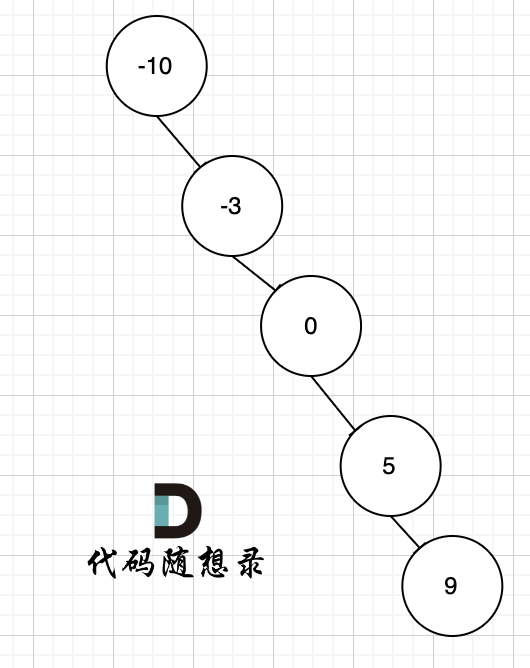

如果根据一个数组构建二叉搜索树，本质是找到一个中间的分割点作为根节点，然后递归左右区间  

对于一个有序数组，分割点就是数组中间位置的节点  
- 奇数长度的数组：分割点（n-1）/ 2   
- 偶数长度的数组：中间两个节点任取一个即可（n-1）/ 2  （可构成两种二叉树）

### 递归三部曲
1. 递归参数和返回值：
   - 递归参数：数组的左右下标（尽量用下标来操作区间）  
   - 返回值：利用递归的返回值来增加二叉树的节点（删除利用了返回值也是同理）  

2. 终止条件：
   - 定义左右闭合的区间，left > right 时则遇到空节点，返回

3. 单层递归逻辑：
   - 取中间元素的位置：每次递归的左右区间都是子树的数值范围，所以相对于原始数组而言，当前子树的根节点对应索引是：mid = left + ((right - left) / 2)  
   - 以中间位置构造根节点，划分区间：
   - root的左孩子接住下一层左区间的返回节点  
   - root的右孩子接住下一层右区间的返回节点  
   - 最后返回root

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = None
        self.right = None

class Solution:
    def traversal(self, nums, left, right):
        if left > right:
            return None
        
        mid = left + (right - left) / 2
        root = TreeNode(nums[mid])   # 根据分割点的值创建节点
        root.left = traversal(nums, left, mid - 1)  # [left, mid-1]这个区间作为分割点的左子树节点
        root.right = traversal(nuns, mid + 1, right)

        return root
    
    def sortedArrayToBST(self, nums):
        root = traversal(nums, 0, len(nums) - 1)
        return root